In [1]:
import pandas

In [6]:
whitew = pandas.read_csv('/Users/thor/Dropbox/Spring_2017_semester/STK4000/Data/winequality-white.csv', sep=';')

In [7]:
whitew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
whitew.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [10]:
variables = [u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality']

In [11]:
%matplotlib inline

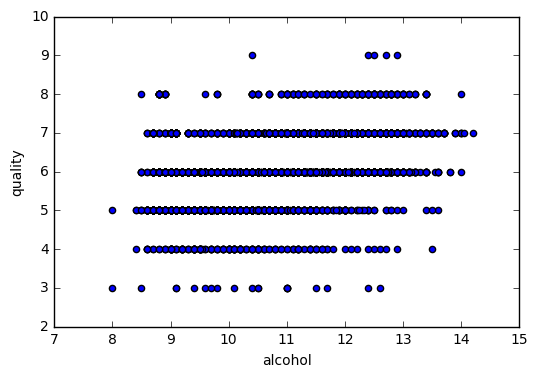

In [12]:
whitew.plot.scatter(x = 'alcohol', y = 'quality')

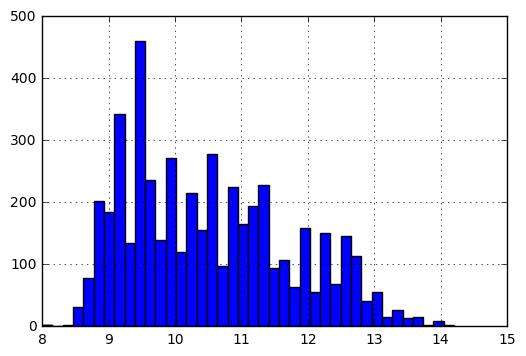

In [13]:
whitew.alcohol.hist(bins = 40)

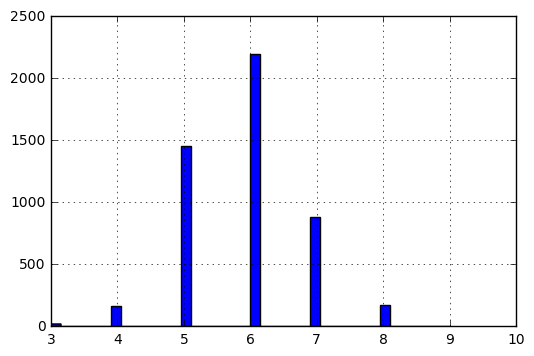

In [14]:
whitew.quality.hist(bins = 40)

In [15]:
import numpy as np

In [16]:
X = whitew[variables].values #define X values - insert variables

In [26]:
N, p = X.shape # define N and number of variables - p

In [28]:
N, p

(4898, 12)

In [29]:
N

4898

In [25]:
p

12

In [ ]:
# adds column containing 1 
X = np.hstack((np.repeat(1, N).reshape(-1,1), X))

In [30]:
XTXi = np.linalg.inv(np.dot(X.transpose(), X))
theta = np.dot(np.dot(XTXi, X.transpose()), whitew['quality'])

In [31]:
theta

array([ -8.39189829e-14,   7.89202037e-13,   1.09978693e-12,
        -1.66880398e-15,   4.23638902e-12,   4.17634677e-16,
        -7.61977287e-16,   1.17172938e-12,  -4.25215418e-13,
        -1.17322818e-13,  -8.18789481e-16,   1.00000000e+00])

In [32]:
X

array([[  7.  ,   0.27,   0.36, ...,   0.45,   8.8 ,   6.  ],
       [  6.3 ,   0.3 ,   0.34, ...,   0.49,   9.5 ,   6.  ],
       [  8.1 ,   0.28,   0.4 , ...,   0.44,  10.1 ,   6.  ],
       ..., 
       [  6.5 ,   0.24,   0.19, ...,   0.46,   9.4 ,   6.  ],
       [  5.5 ,   0.29,   0.3 , ...,   0.38,  12.8 ,   7.  ],
       [  6.  ,   0.21,   0.38, ...,   0.32,  11.8 ,   6.  ]])

In [34]:
list(zip(['const'] + variables, theta))

[('const', -8.391898287385402e-14),
 (u'fixed acidity', 7.8920203705479253e-13),
 (u'volatile acidity', 1.0997869281936801e-12),
 (u'citric acid', -1.6688039838896884e-15),
 (u'residual sugar', 4.2363890173646723e-12),
 (u'chlorides', 4.1763467684141631e-16),
 (u'free sulfur dioxide', -7.6197728682281252e-16),
 (u'total sulfur dioxide', 1.1717293801893902e-12),
 (u'density', -4.2521541843143495e-13),
 (u'pH', -1.1732281812726342e-13),
 (u'sulphates', -8.1878948066105295e-16),
 (u'alcohol', 0.99999999999998468)]

Calculate

$$\operatorname{Var}(\hat \theta) = (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2\,,$$

approximating

$$\hat \sigma^2 = \frac{1}{N-p-1}\sum_{i=1}^{N} (y_i - \hat y_i)^2\,.$$

In [35]:
sigma = 1./(N - p - 1) * sum((np.dot(X, theta) - whitew['quality'])**2)

In [39]:
sigma, XTXi

(9.6372203512100204e-26,
 array([[  3.98379840e-04,   1.14240168e-04,  -5.99622620e-04,
           5.25450394e-06,   1.22924824e-03,   3.34563823e-06,
          -1.34899408e-06,  -5.71652609e-03,   9.22587944e-04,
          -4.54487758e-05,   6.95047307e-06,   1.81046542e-05],
        [  1.14240168e-04,   2.40575630e-02,   3.23342765e-03,
          -6.75575930e-05,  -1.20911966e-02,   3.16539639e-05,
          -1.60121771e-05,  -6.33648003e-03,   8.38002280e-04,
           4.64099621e-04,  -6.84283417e-04,   7.00883847e-04],
        [ -5.99622620e-04,   3.23342765e-03,   1.61734604e-02,
          -2.33972674e-05,  -1.08955076e-02,  -3.77729537e-06,
          -3.44231447e-06,  -1.33282435e-03,   7.34267972e-04,
          -1.00778343e-03,  -1.44645316e-04,   1.05030899e-05],
        [  5.25450394e-06,  -6.75575930e-05,  -2.33972674e-05,
           1.19704781e-05,   3.37777670e-04,  -3.05879471e-07,
          -2.62735827e-07,  -4.99786903e-04,   8.20332653e-05,
           2.36935067e-05, 

In [37]:
var_theta = np.dot(XTXi, sigma)

In [38]:
?np.dot

In [40]:
d_theta = np.sqrt(var_theta.diagonal())

Calculate the z-scores

$$z_j = \frac{\hat \theta_j}{\hat \sigma \sqrt{v_j}}$$

and corresponding P values. 

In [41]:
from scipy.stats import t

In [42]:
for c, dc, name in zip(theta, d_theta, ['const'] + variables):
    z = c / dc
    P = 2*t.sf(abs(z), N - p - 1)
    print "".join(["{:>12f}".format(i) for i in c, dc, z, P]), name, 
    if P < 0.05:
        print '***'
    else:# ...
        print

   -0.000000    0.000000  -13.543647    0.000000 const ***
    0.000000    0.000000   16.390284    0.000000 fixed acidity ***
    0.000000    0.000000   27.856797    0.000000 volatile acidity ***
   -0.000000    0.000000   -1.553723    0.120315 citric acid
    0.000000    0.000000   18.997159    0.000000 residual sugar ***
    0.000000    0.000000    1.208420    0.226944 chlorides
   -0.000000    0.000000   -4.971784    0.000001 free sulfur dioxide ***
    0.000000    0.000000    8.050958    0.000000 total sulfur dioxide ***
   -0.000000    0.000000  -12.384762    0.000000 density ***
   -0.000000    0.000000   -2.930732    0.003397 pH ***
   -0.000000    0.000000   -0.162294    0.871081 sulphates
    1.000000    0.000000170280141392422.125000    0.000000 alcohol ***


In [43]:
from scipy.optimize import curve_fit

In [44]:
variables

[u'fixed acidity',
 u'volatile acidity',
 u'citric acid',
 u'residual sugar',
 u'chlorides',
 u'free sulfur dioxide',
 u'total sulfur dioxide',
 u'density',
 u'pH',
 u'sulphates',
 u'alcohol',
 u'quality']

In [45]:
def f_lin_reg(X, t0, *thetas):
    return t0 + sum(theta*X[var] for theta, var in zip(thetas, variables))

In [46]:
beta, pcov = curve_fit(f_lin_reg,
                      whitew, 
                      whitew['quality'],
                      [0]*(1+len(variables)))

In [47]:
list(zip(beta, theta))

[(3.9836875714579428e-06, -8.391898287385402e-14),
 (8.2016067038646176e-10, 7.8920203705479253e-13),
 (-2.3565613090156612e-08, 1.0997869281936801e-12),
 (4.1487663620175608e-09, -1.6688039838896884e-15),
 (1.4002708077498628e-09, 4.2363890173646723e-12),
 (3.6050656144557395e-08, 4.1763467684141631e-16),
 (-3.1045318853816116e-11, -7.6197728682281252e-16),
 (1.1120930446405839e-11, 1.1717293801893902e-12),
 (-3.9350665926907187e-06, -4.2521541843143495e-13),
 (-1.2098809325776058e-08, -1.1732281812726342e-13),
 (1.0104824360806894e-08, -8.1878948066105295e-16),
 (-4.3918264496369453e-09, 0.99999999999998468)]

In [48]:
pcov.diagonal()

array([  1.49829230e-16,   7.38493668e-23,   3.11777599e-20,
         3.25664460e-21,   3.49211503e-23,   2.64861647e-19,
         3.14327510e-25,   3.22397342e-26,   1.50523369e-16,
         2.51045040e-21,   1.07101887e-20,   3.29518434e-22,
         6.33438919e-21])

In [49]:
var_theta.diagonal()

array([  3.83927431e-29,   2.31848036e-27,   1.55867202e-27,
         1.15362135e-30,   4.97295287e-26,   1.19442096e-31,
         2.34887266e-32,   2.11816393e-26,   1.17880698e-27,
         1.60255388e-27,   2.54529274e-29,   3.44883165e-29])

In [50]:
import matplotlib.pyplot as plt

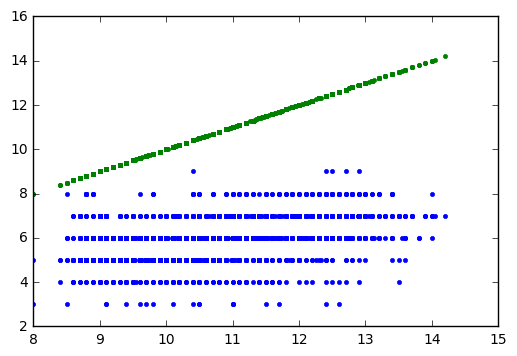

In [51]:
plt.plot(whitew.alcohol, whitew.quality, '.')
plt.plot(whitew.alcohol, f_lin_reg(whitew, *theta), '.')

In [52]:
from itertools import combinations

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
def LinRSS(X, y):
    f = LinearRegression().fit(X, y)
    return sum((f.predict(X) - y)**2)

In [55]:
list(combinations([1,2,3], 2))

[(1, 2), (1, 3), (2, 3)]

In [58]:
RSS = {}
for k in range(1, len(variables) + 1):
    RSS[k] = {}
    for subset in combinations(variables, k):
        RSS[k][subset] = LinRSS(whitew[list(subset)], whitew.quality)

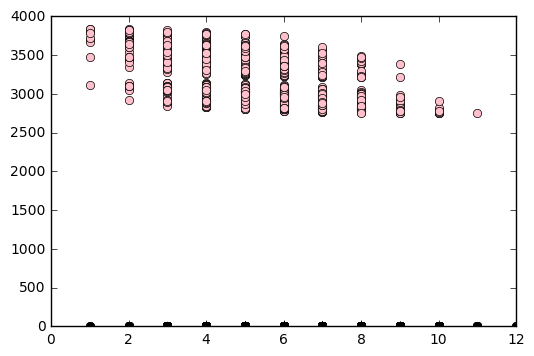

In [59]:
for i in RSS:
    plt.plot([i]*len(RSS[i]), RSS[i].values(), 'o', color = 'pink')
    plt.plot([i], min(RSS[i].values()), 'o', color = 'black')

# Ridge regression

In [60]:
for column in variables:
    mean, std = whitew[column].mean(), whitew[column].std()
    whitew[column] = whitew[column] - mean / std

Define function to calculate
$$\operatorname{df}(\lambda) = 
\operatorname{tr}\left\{\mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\right\}$$



In [63]:
def dof_eff(l): #L not one, define l
    X = whitew[variables].values
    N, p = X.shape
    XTXi = np.linalg.inv(np.dot(X.transpose(), X) + np.identity(p) * 1)
    return np.dot(np.dot(X, XTXi), X.transpose()).trace()

Now, we want to calculate which values for $\lambda$ correspond to a set of pre-defined values for degrees of freedom

In [66]:
from scipy.optimize import minimize_scalar

In [68]:
dof = np.arange(0.5, 10, 0.5)
lambdas = [minimize_scalar(lambda l: (dof_eff(l) - d)**2).x for d in dof]

Define regression function for ridge regression, fixing $\theta_0 = \hat y$.

In [70]:
theta0 = np.mean(whitew.quality)

In [71]:
def f_ridge(X, *thetas):
    return theta0 + sum(theta*X[var]
                       for theta, var in zip(thetas, variables))

In [72]:
def ridge(l):
    def D_ridge(thetas):
        fev = f_ridge(whitew, *thetas) - whitew['quality']
        penalty = [np.sqrt(l)*theta for theta in thetas]
        return np.concatenate((fev, penalty))
    return D_ridge

Minimize ridge regression equation using least squares



In [73]:
from scipy.optimize import leastsq

In [77]:
from regression_params import lambdas as lds

ImportError: No module named regression_params

In [79]:
MSE = []
thetas = []
for l in lambdas:
    theta = leastsq(ridge(l), [0]*len(variables))[0]
    thetas.append(theta)
    f = f_ridge(whitew, *theta)
    MSE.append(np.mean((whitew['quality'] - f)**2))

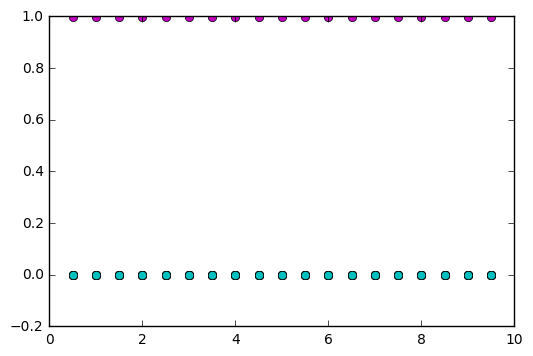

In [80]:
for i in range(len(variables)):
    plt.plot(dof, [theta[i] for theta in thetas], 'o')

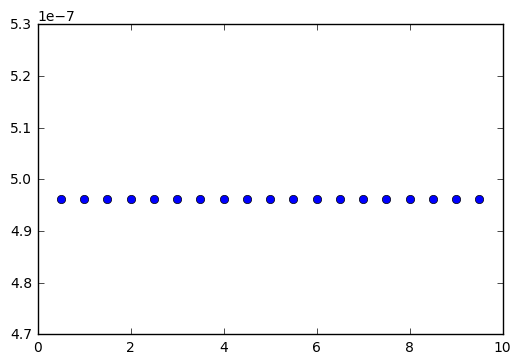

In [81]:
plt.plot(dof, MSE, 'o')